In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

dataset_path = Path().cwd()
dt = xr.open_datatree(
    dataset_path / "Model vs Exp for hdh.h5xp", engine="h5netcdf", phony_dims="sort"
)["/Packed Data"].to_dataset()
dt_si = xr.open_datatree(
    dataset_path / "Model vs Exp Si for hdh.h5xp", engine="h5netcdf", phony_dims="sort"
)["/Packed Data"].to_dataset()
# Convert the xarray dataset to a pandas DataFrame
# everything that starts with "exp*" and turn those into columns of a DataFrame
energy = dt["expEnergy1_alpha27"].to_numpy()
exp_cols = {f"spec_{i}": dt[f"expSpec{i}_alpha27"].to_numpy() for i in range(1, 5)}
exp_cols["energy"] = energy
df = pd.DataFrame(exp_cols)
# Add Si data
energy_si = dt_si["expEnergy1_alpha88"].to_numpy()
exp_cols_si = {
    f"spec_{i}": dt_si[f"expSpec{i}_alpha88"].to_numpy() for i in range(1, 5)
}
exp_cols_si["energy"] = energy_si
df_si = pd.DataFrame(exp_cols_si)
# plot the data
incident_angles = [40, 55, 70, 90]
# rename the spectra columns with the degree
df = df.rename(
    columns={
        f"spec_{i}": f"{angle}" for i, angle in enumerate(incident_angles, start=1)
    }
)
df_si = df_si.rename(
    columns={
        f"spec_{i}": f"{angle}" for i, angle in enumerate(incident_angles, start=1)
    }
)

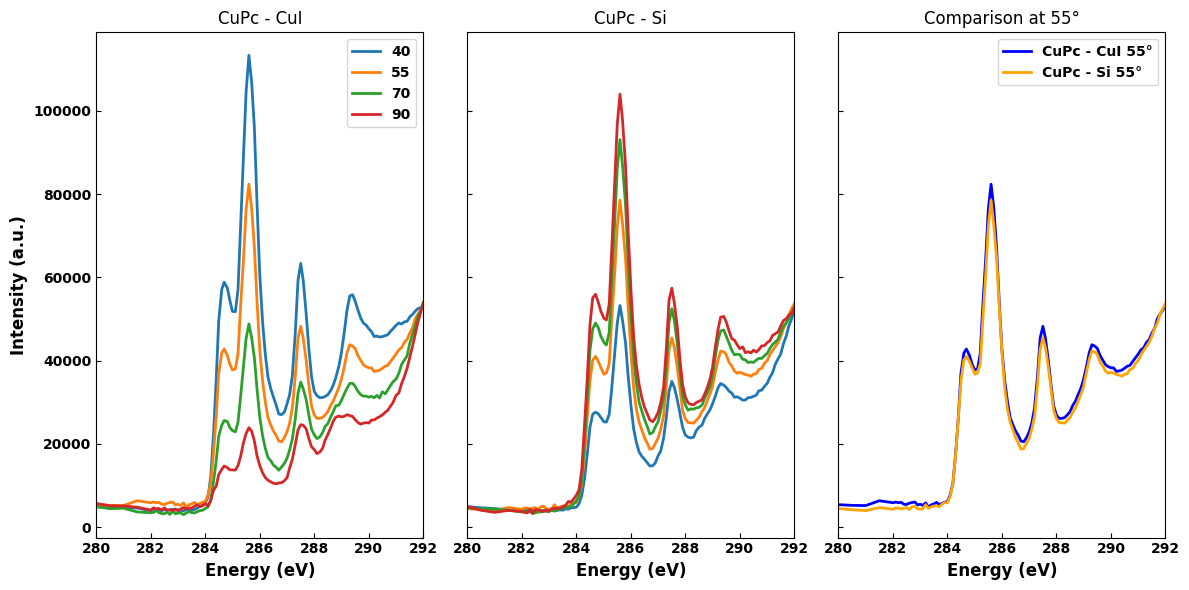

In [3]:
# calculate the residual percent difference between the 55 degree traces in si and cuI
residuals_55deg = ((df["55"] - df_si["55"]) / df_si["55"] * 100).rename("Residuals (%)")

fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
df.plot(
    x="energy",
    ax=ax[0],
    title="CuPc - CuI",
    xlabel="Energy (eV)",
    ylabel="Intensity (a.u.)",
    lw=2,
)
df_si.plot(
    x="energy",
    ax=ax[1],
    title="CuPc - Si",
    xlabel="Energy (eV)",
    ylabel="Intensity (a.u.)",
    legend=False,
    lw=2,
)
ax[2].plot(
    df["energy"],
    df["55"],
    label="CuPc - CuI 55°",
    color="blue",
    lw=2,
)
ax[2].plot(
    df_si["energy"],
    df_si["55"],
    label="CuPc - Si 55°",
    color="orange",
    lw=2,
)
# add the
ax[2].set_title("Comparison at 55°")
ax[2].set_xlabel("Energy (eV)")
ax[2].set_ylabel("Intensity (a.u.)")
ax[2].legend()
ax[0].set_xlim(280, 292)
ax[1].set_xlim(280, 292)
ax[2].set_xlim(280, 292)
plt.tight_layout()


In [4]:
# pull out the fitted data
fitted_cols = {
    f"{incident_angles[i - 1]}": dt[f"fitresults{i}_alpha27"].to_numpy()
    for i in range(1, 5)
}
fitted_cols_si = {
    f"{incident_angles[i - 1]}": dt_si[f"fitresults{i}_alpha88"].to_numpy()
    for i in range(1, 5)
}
fitted_cols["energy"] = energy
fitted_cols_si["energy"] = energy_si
df_fitted = pd.DataFrame(fitted_cols)
df_fitted_si = pd.DataFrame(fitted_cols_si)
display(df_fitted)
display(df_fitted_si)

,40,55,70,90,energy
0,4289.028809,4289.025879,4289.023926,4289.022461,280.000580
1,4272.797363,4272.793945,4272.791016,4272.789551,280.499725
2,4257.821777,4257.817383,4257.813477,4257.811523,280.998138
3,4244.404297,4244.398438,4244.394043,4244.391113,281.499268
4,4232.765137,4232.757812,4232.751465,4232.748535,282.007874
...,...,...,...,...,...
211,24516.910156,24501.041016,24487.964844,24480.841797,344.996674
212,24365.378906,24352.972656,24342.937500,24337.363281,346.001648
213,24246.871094,24237.240234,24228.990234,24224.818359,346.989319
214,24165.666016,24158.314453,24152.257812,24148.947266,347.998352


,40,55,70,90,energy
0,4288.973633,4288.975586,4288.977051,4288.977539,280.002411
1,4272.752930,4272.755371,4272.757324,4272.758301,280.503540
2,4257.783691,4257.786621,4257.789062,4257.790527,280.998322
3,4244.368164,4244.372070,4244.375488,4244.377441,281.498413
4,4232.729004,4232.733398,4232.737793,4232.740234,282.001678
...,...,...,...,...,...
211,24490.867188,24501.609375,24510.267578,24514.955078,344.994659
212,24344.857422,24353.507812,24360.421875,24363.800781,346.003052
213,24230.761719,24237.117188,24242.294922,24245.521484,346.995117
214,24153.306641,24158.169922,24162.445312,24164.806641,348.004395


/tmp/ipykernel_6211/2513077762.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.10064975006609762' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  residuals.loc[
/tmp/ipykernel_6211/2513077762.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.182362151882972' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  residuals.loc[
/tmp/ipykernel_6211/2513077762.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9.37955339342731' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  residuals.loc[
/tmp/ipykernel_6211/2513077762.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an erro

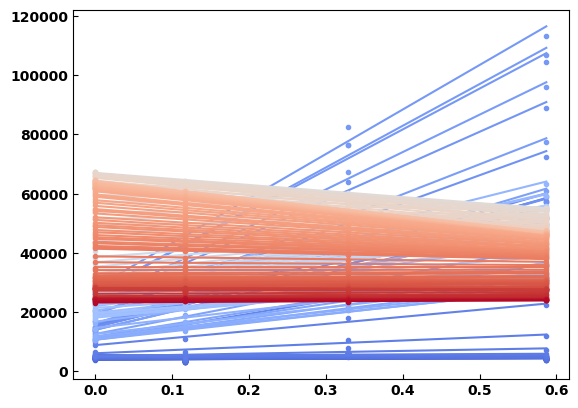

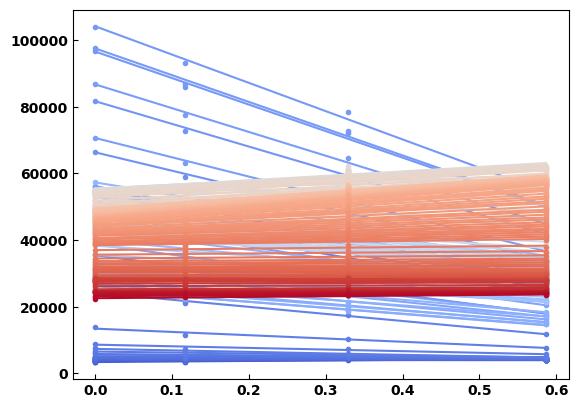

In [5]:
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit


def linear_fit(x, a, b):
    return a * x + b


residuals = pd.DataFrame(
    {
        "energy": df["energy"],
        **{f"{angle}": [0] * len(df) for angle in incident_angles},
    }
)
residuals_si = pd.DataFrame(
    {
        "energy": df_si["energy"],
        **{f"{angle}": [0] * len(df_si) for angle in incident_angles},
    }
)
optimal = []
sns.color_palette("coolwarm", as_cmap=True)
fig, ax = plt.subplots()
for i, e in enumerate(energy):
    row = df.where(df["energy"] == e).dropna()
    x = incident_angles
    cos_x = np.cos(np.radians(x)) ** 2
    y = row[[f"{angle}" for angle in incident_angles]].values.flatten()
    # calculate the quick slope and intercept using the first and last points
    slope = (y[-1] - y[0]) / (cos_x[-1] - cos_x[0])
    intercept = y[0] - slope * cos_x[0]
    popt, pcov = curve_fit(
        linear_fit, cos_x, y, p0=[1, 0], bounds=([-np.inf, -np.inf], [np.inf, np.inf])
    )
    # calculate the residuals as a percentage from the linear fit
    resid_abs = y - linear_fit(cos_x, *popt)
    resid_percentage = [
        (r / y_i) * 100 for r, y_i in zip(resid_abs, y, strict=True) if y_i != 0
    ]
    residuals.loc[
        residuals["energy"] == e, [f"{angle}" for angle in incident_angles]
    ] = resid_percentage
    optimal.append((e, *popt))
    ax.plot(
        cos_x,
        y,
        marker=".",
        linestyle="None",
        label=f"Energy {e:.2f}",
        color=sns.color_palette("coolwarm", as_cmap=True)(i / len(energy)),
    )
    ax.plot(
        cos_x,
        linear_fit(cos_x, *popt),
        linestyle="-",
        color=sns.color_palette("coolwarm", as_cmap=True)(i / len(energy)),
    )

optimal_si = []
sns.color_palette("coolwarm", as_cmap=True)
fig, ax = plt.subplots()
for i, e in enumerate(energy_si):
    row = df_si.where(df_si["energy"] == e).dropna()
    x = incident_angles
    cos_x = np.cos(np.radians(x)) ** 2
    y = row[[f"{angle}" for angle in incident_angles]].values.flatten()
    # calculate the quick slope and intercept using the first and last points
    slope = (y[-1] - y[0]) / (cos_x[-1] - cos_x[0])
    intercept = y[0] - slope * cos_x[0]
    popt, pcov = curve_fit(
        linear_fit, cos_x, y, p0=[1, 0], bounds=([-np.inf, -np.inf], [np.inf, np.inf])
    )
    # calculate the residuals as a percentage from the linear fit
    resid_abs = y - linear_fit(cos_x, *popt)
    resid_percentage = [
        (r / y_i) * 100 for r, y_i in zip(resid_abs, y, strict=True) if y_i != 0
    ]
    residuals_si.loc[
        residuals_si["energy"] == e, [f"{angle}" for angle in incident_angles]
    ] = resid_percentage
    optimal_si.append((e, *popt))
    ax.plot(
        cos_x,
        y,
        marker=".",
        linestyle="None",
        label=f"Energy {e:.2f}",
        color=sns.color_palette("coolwarm", as_cmap=True)(i / len(energy)),
    )
    ax.plot(
        cos_x,
        linear_fit(cos_x, *popt),
        linestyle="-",
        color=sns.color_palette("coolwarm", as_cmap=True)(i / len(energy)),
    )

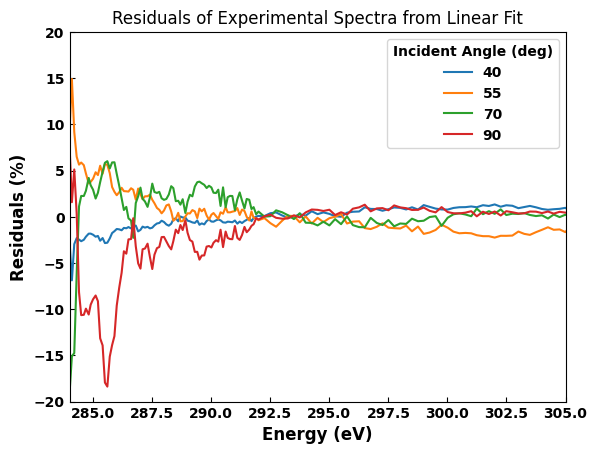

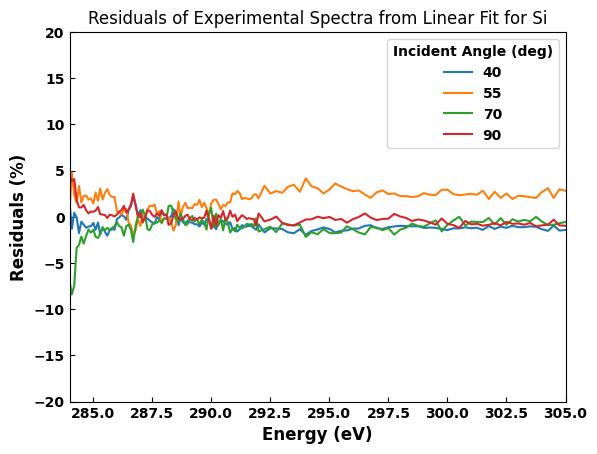

In [6]:
fig, ax = plt.subplots()
residuals.plot(x="energy", ax=ax)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Residuals (%)")
ax.set_title("Residuals of Experimental Spectra from Linear Fit")
ax.legend(title="Incident Angle (deg)")
ax.set_xlim(284, 305)
ax.set_ylim(-20, 20)

plt.show()
fig, ax = plt.subplots()
residuals_si.plot(x="energy", ax=ax)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Residuals (%)")
ax.set_title("Residuals of Experimental Spectra from Linear Fit for Si")
ax.legend(title="Incident Angle (deg)")
ax.set_xlim(284, 305)
ax.set_ylim(-20, 20)
plt.show()

/tmp/ipykernel_6211/2680382721.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-15.479131042957306' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  redisduals_clustered.loc[
/tmp/ipykernel_6211/2680382721.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-20.30739039182663' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  redisduals_clustered.loc[
/tmp/ipykernel_6211/2680382721.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-11.79179772734642' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  redisduals_clustered.loc[
/tmp/ipykernel_6211/2680382721.py:23: FutureWarning: Setting an item of incompatible dtype is

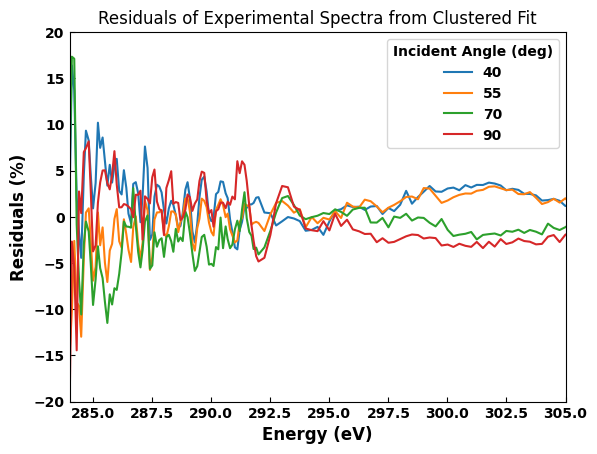

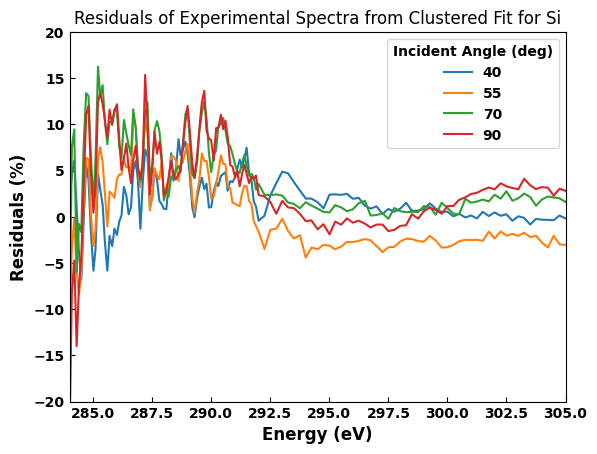

In [7]:
# calculate the residuals as a percentage from the clustered fit
redisduals_clustered = pd.DataFrame(
    {
        "energy": df["energy"],
        **{f"{angle}": [0] * len(df) for angle in incident_angles},
    }
)
redisduals_clustered_si = pd.DataFrame(
    {
        "energy": df_si["energy"],
        **{f"{angle}": [0] * len(df_si) for angle in incident_angles},
    }
)
for i, e in enumerate(energy):
    refined_row = df_fitted.where(df_fitted["energy"] == e).dropna()
    real_row = df.where(df["energy"] == e).dropna()
    for angle in incident_angles:
        y_fit = refined_row[f"{angle}"].values.flatten()[0]
        y_real = real_row[f"{angle}"].values.flatten()[0]
        if y_real != 0:
            resid_abs = y_fit - y_real
            resid_percentage = (resid_abs / y_real) * 100
            redisduals_clustered.loc[
                redisduals_clustered["energy"] == e, f"{angle}"
            ] = resid_percentage

for i, e in enumerate(energy_si):
    refined_row = df_fitted_si.where(df_fitted_si["energy"] == e).dropna()
    real_row = df_si.where(df_si["energy"] == e).dropna()
    for angle in incident_angles:
        y_fit = refined_row[f"{angle}"].values.flatten()[0]
        y_real = real_row[f"{angle}"].values.flatten()[0]
        if y_real != 0:
            resid_abs = y_fit - y_real
            resid_percentage = (resid_abs / y_real) * 100
            redisduals_clustered_si.loc[
                redisduals_clustered_si["energy"] == e, f"{angle}"
            ] = resid_percentage

fig, ax = plt.subplots()
redisduals_clustered.plot(x="energy", ax=ax)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Residuals (%)")
ax.set_title("Residuals of Experimental Spectra from Clustered Fit")
ax.legend(title="Incident Angle (deg)")
ax.set_xlim(284, 305)
ax.set_ylim(-20, 20)
plt.show()
fig, ax = plt.subplots()
redisduals_clustered_si.plot(x="energy", ax=ax)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Residuals (%)")
ax.set_title("Residuals of Experimental Spectra from Clustered Fit for Si")
ax.legend(title="Incident Angle (deg)")
ax.set_xlim(284, 305)
ax.set_ylim(-20, 20)
plt.show()

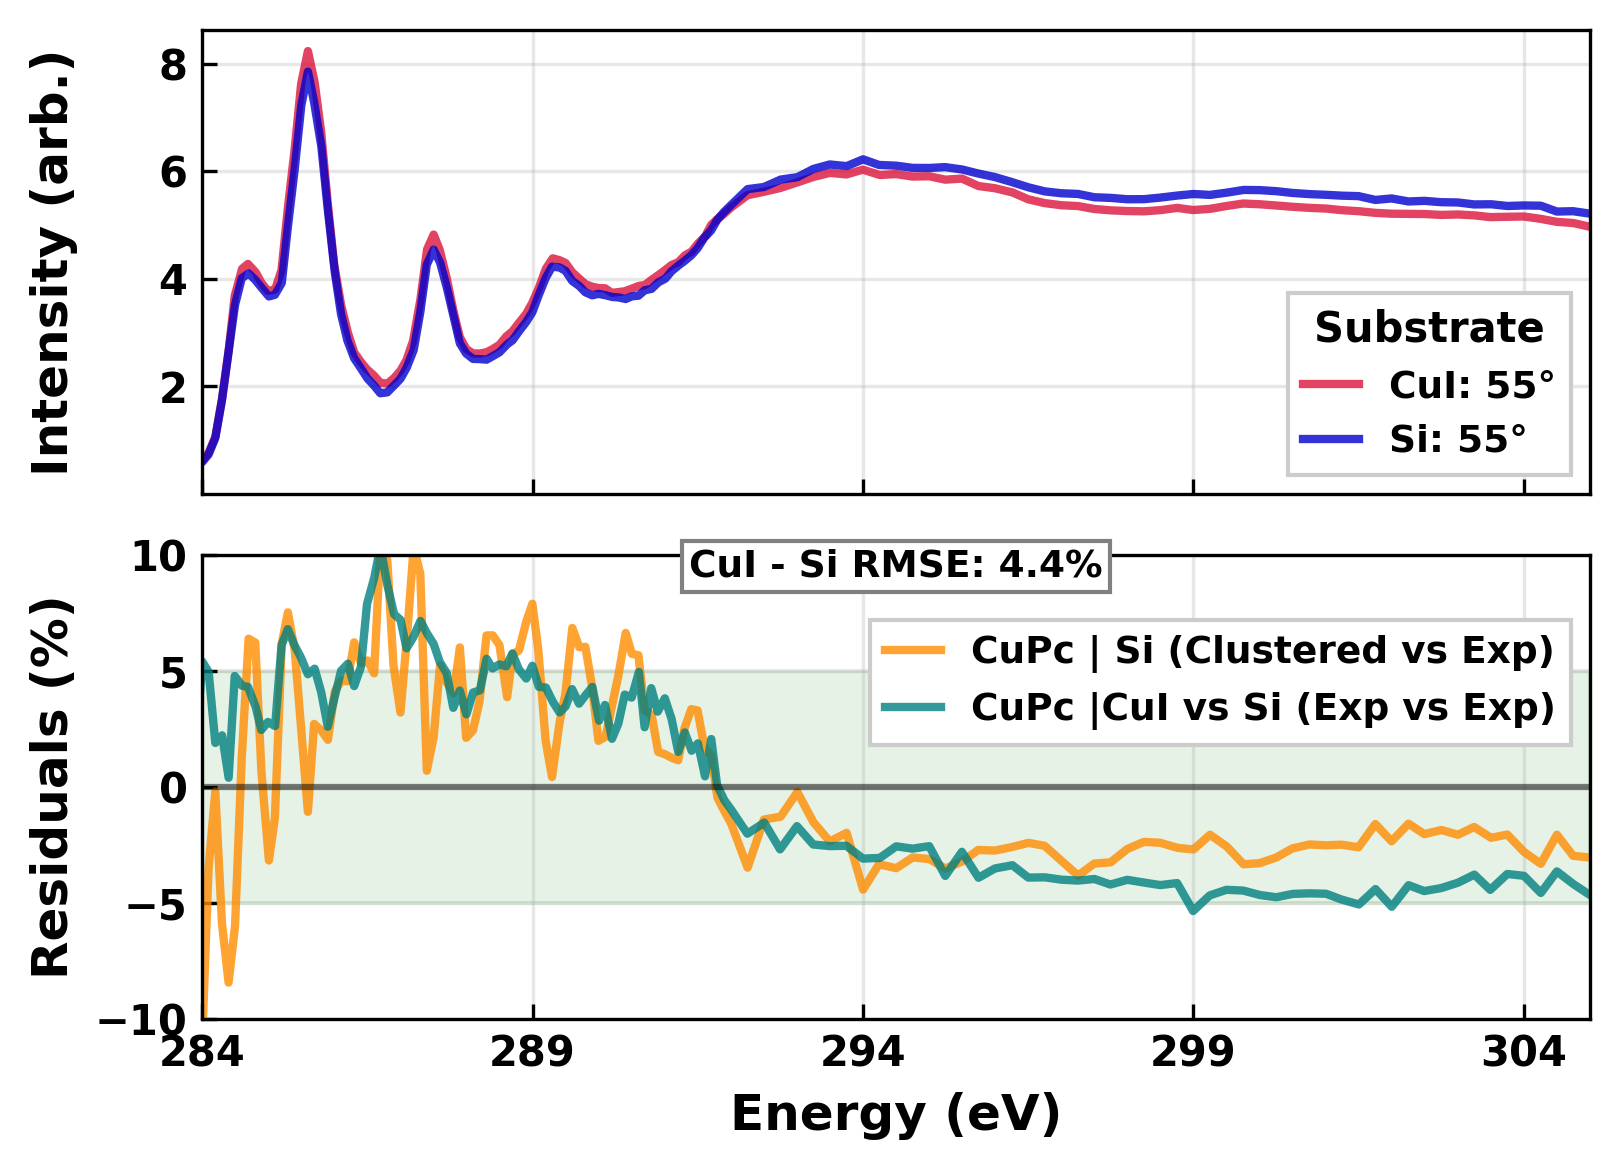

RMSE between CuI and Si 55° traces (284-305 eV): 4.41%


In [8]:
# Calculate the percent difference between CuI and Si 55° traces
residuals_55deg = ((df["55"] - df_si["55"]) / df_si["55"] * 100).rename("Residuals (%)")

# Create a comparison plot with residuals and traces
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(5.5, 4), sharex=True, dpi=300)

# Top plot: Residuals comparison
ax1.plot(
    redisduals_clustered_si["energy"],
    redisduals_clustered_si["55"],
    label="CuPc | Si (Clustered vs Exp)",
    color="darkorange",  # Updated color
    linewidth=2,
    alpha=0.8,
)

ax1.plot(
    df["energy"],
    residuals_55deg.values,
    label="CuPc |CuI vs Si (Exp vs Exp)",
    color="teal",  # Updated color
    linewidth=2,
    alpha=0.8,
)

# Add shading for good fit region
ax1.axhspan(-5, 5, color="green", alpha=0.1, zorder=0)
# Configure top plot
ax1.set_ylabel("Residuals (%)", fontsize=12)

ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color="black", linestyle="-", alpha=0.5)
ax1.set_xlim(284, 305)
ax1.set_ylim(-10, 10)
ax1.legend(
    loc="upper right",
    bbox_to_anchor=(1.0, 0.9),
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    columnspacing=1.0,
    title_fontsize=10,
    fancybox=False,
    framealpha=1,
)

# Bottom plot: 55° traces comparison
ax2.plot(
    df["energy"],
    df["55"] * 1e-4,
    label="CuI: 55°",
    color="crimson",  # Updated color
    linewidth=2,
    alpha=0.8,
)

ax2.plot(
    df_si["energy"],
    df_si["55"] * 1e-4,
    label="Si: 55°",
    color="mediumblue",  # Updated color
    linewidth=2,
    alpha=0.8,
)

# Configure bottom plot
ax1.set_xlabel("Energy (eV)", fontsize=12)
ax2.set_ylabel("Intensity (arb.)", fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(
    title="Substrate",
    loc="lower right",
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    columnspacing=1.0,
    title_fontsize=10,
    fancybox=False,
    framealpha=1,
)
# set the x-axis to use whole number intervals of 5
ax2.set_xticks(range(284, 306, 5))

# Calculate RMSE for the energy range 284-305 eV
energy_mask = (df["energy"] >= 284) & (df["energy"] <= 305)
energy_mask_si = (df_si["energy"] >= 284) & (df_si["energy"] <= 305)

# Filter data to same energy range
cui_55_filtered = df[energy_mask]["55"]
si_55_filtered = df_si[energy_mask_si]["55"]

# Calculate RMSE percent error
rmse_percent = np.sqrt(
    np.mean(((cui_55_filtered - si_55_filtered) / si_55_filtered * 100) ** 2)
)

# Add RMSE text to the plot
ax1.text(
    294.5,
    9.5,
    f"CuI - Si RMSE: {rmse_percent:.1f}%",
    fontsize=9,
    ha="center",
    va="center",
    bbox=dict(
        facecolor="white", alpha=1.0, boxstyle="square,pad=0.2", edgecolor="gray"
    ),
)

fig.align_labels()
plt.tight_layout()
plt.show()
fig.savefig(
    dataset_path / "CuPc_CuI_Si_55deg_comparison.svg",
    format="svg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)


print(f"RMSE between CuI and Si 55° traces (284-305 eV): {rmse_percent:.2f}%")

Text(0.5, 1.0, 'Residuals Comparison (Correlation: 0.82)')

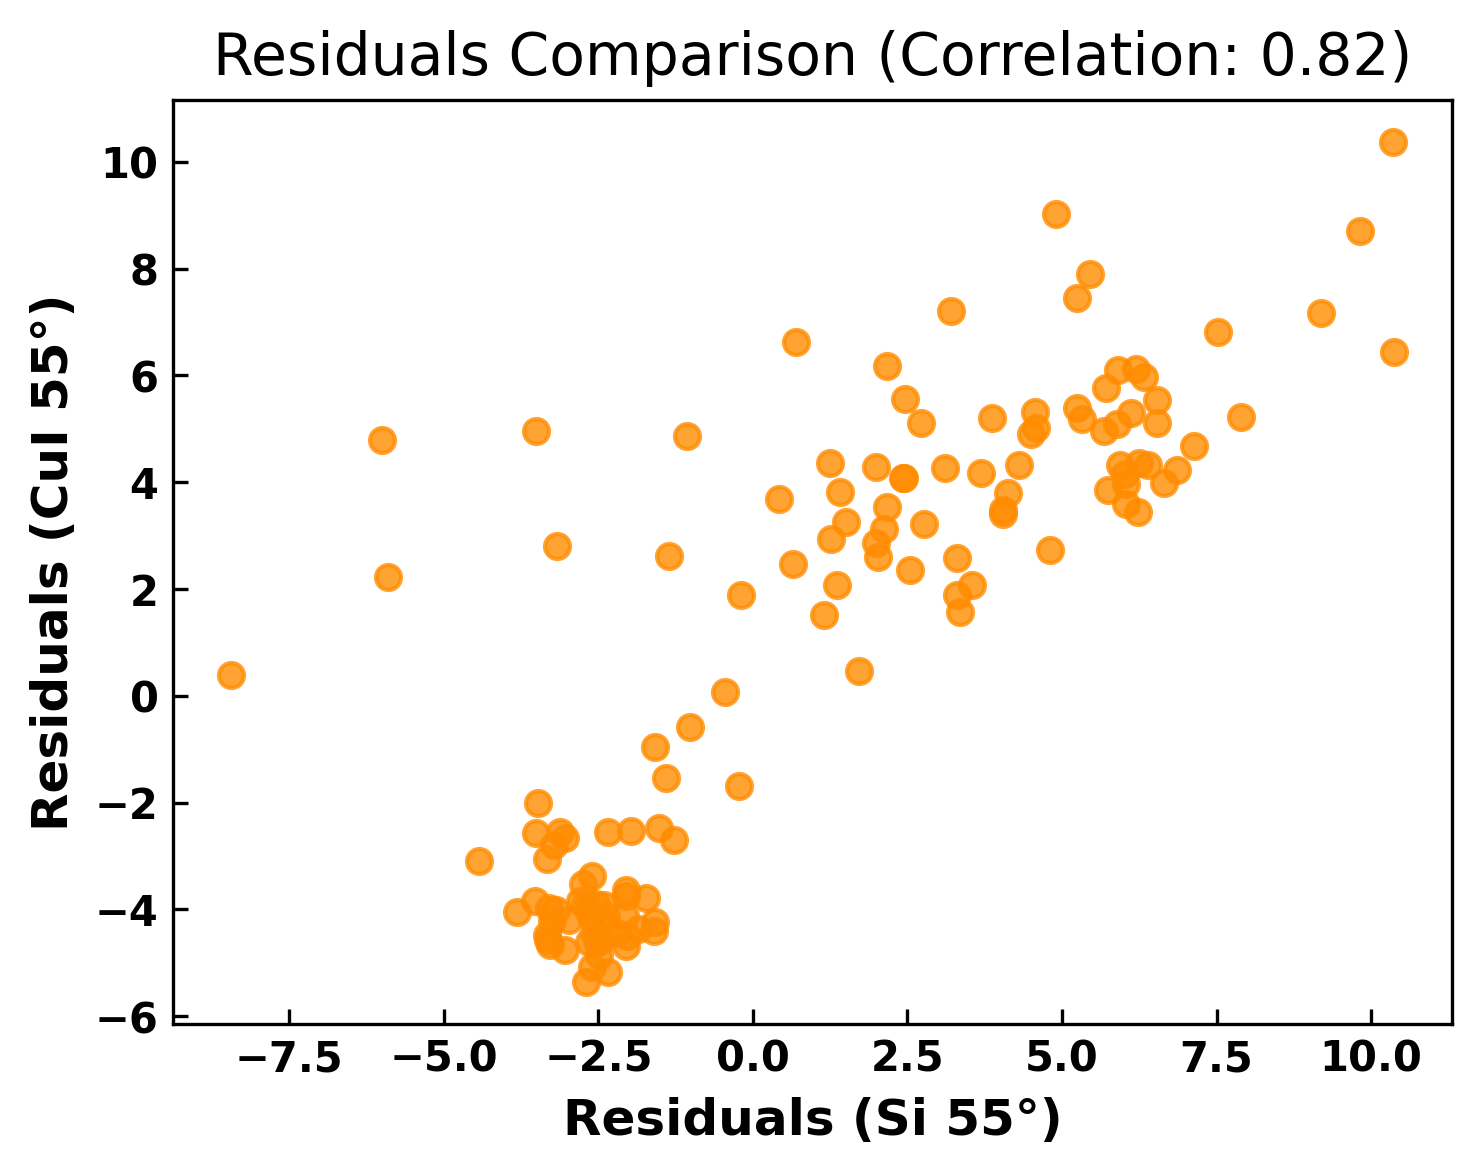

In [9]:
# plot redisual vs residual_si
# Define energy masks based on the original df and df_si energy columns
energy_mask_cui = (df["energy"] >= 284) & (df["energy"] <= 305)
energy_mask_si_substrate = (df_si["energy"] >= 284) & (df_si["energy"] <= 305)

# Create a common mask. This selects row indices where BOTH conditions are met.
# This assumes residuals_55deg and redisduals_clustered_si are the full versions
# from Cell 5/6 before this filtering step in Cell 7.
common_mask = energy_mask_cui & energy_mask_si_substrate

# Filter redisduals_clustered_si using the common_mask.
# The 'energy' column in redisduals_clustered_si originates from df_si["energy"].
# The common_mask ensures this condition is met.
redisduals_clustered_si = redisduals_clustered_si[common_mask]

# Filter residuals_55deg using the common_mask.
# This series is derived from both df and df_si.
residuals_55deg = residuals_55deg[common_mask]
fig, ax = plt.subplots(figsize=(5.5, 4), dpi=300)
ax.plot(
    redisduals_clustered_si["55"],
    residuals_55deg.values,
    marker="o",
    linestyle="None",
    color="darkorange",  # Updated color
    alpha=0.8,
)
# calculate the correlation coefficient
correlation = np.corrcoef(redisduals_clustered_si["55"], residuals_55deg.values)[0, 1]
ax.set_xlabel("Residuals (Si 55°)", fontsize=12)
ax.set_ylabel("Residuals (CuI 55°)", fontsize=12)
ax.set_title(f"Residuals Comparison (Correlation: {correlation:.2f})", fontsize=14)

In [ ]:
from scipy import stats
def calculate_correlation_stats(data1, data2):
    """
    Calculates the Pearson correlation coefficient (r) and the Coefficient
    of Determination (R-squared) for two datasets.

    This function addresses the assumptions of the Pearson correlation by first
    checking for and removing any pairs with NaN (Not a Number) values, which
    could otherwise cause errors.

    Args:
        data1 (array-like): The first dataset (e.g., a list or NumPy array).
        data2 (array-like): The second dataset (e.g., a list or NumPy array).
                           Must be the same length as data1.

    Returns:
        tuple: A tuple containing:
            - pearson_r (float): The Pearson correlation coefficient.
            - r_squared_percent (float): The R-squared value, expressed as a
                                         percentage (from 0 to 100).
            - p_value (float): The two-tailed p-value, indicating the statistical
                               significance of the correlation.
    """
    # Convert inputs to NumPy arrays to handle potential lists and for consistency
    x = np.array(data1)
    y = np.array(data2)

    # --- Pre-computation Check ---
    # Ensure the datasets have the same number of elements
    if x.shape != y.shape:
        raise ValueError("Input datasets must have the same shape.")

    # Remove pairs with NaN values to ensure correlation is calculated correctly
    # This handles the "Related Pairs" assumption mentioned in the guide.
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[valid_indices]
    y_clean = y[valid_indices]

    # Check if there's enough data left to compute correlation
    if len(x_clean) < 2:
        # Not enough data points to form a correlation
        return (np.nan, np.nan, np.nan)

    # --- Core Calculation ---
    # The scipy.stats.pearsonr function is a reliable and direct way to get
    # both the correlation coefficient and the p-value.
    # It returns: r-coefficient, p-value
    pearson_r, p_value = stats.pearsonr(x_clean, y_clean)

    # --- Calculate R-squared ("Percent Correlated") ---
    # As defined in the guide, R-squared is the square of the Pearson r.
    # We multiply by 100 to express it as a percentage.
    r_squared_percent = pearson_r**2 * 100

    return pearson_r, r_squared_percent, p_value

/tmp/ipykernel_6211/3766082797.py:246: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


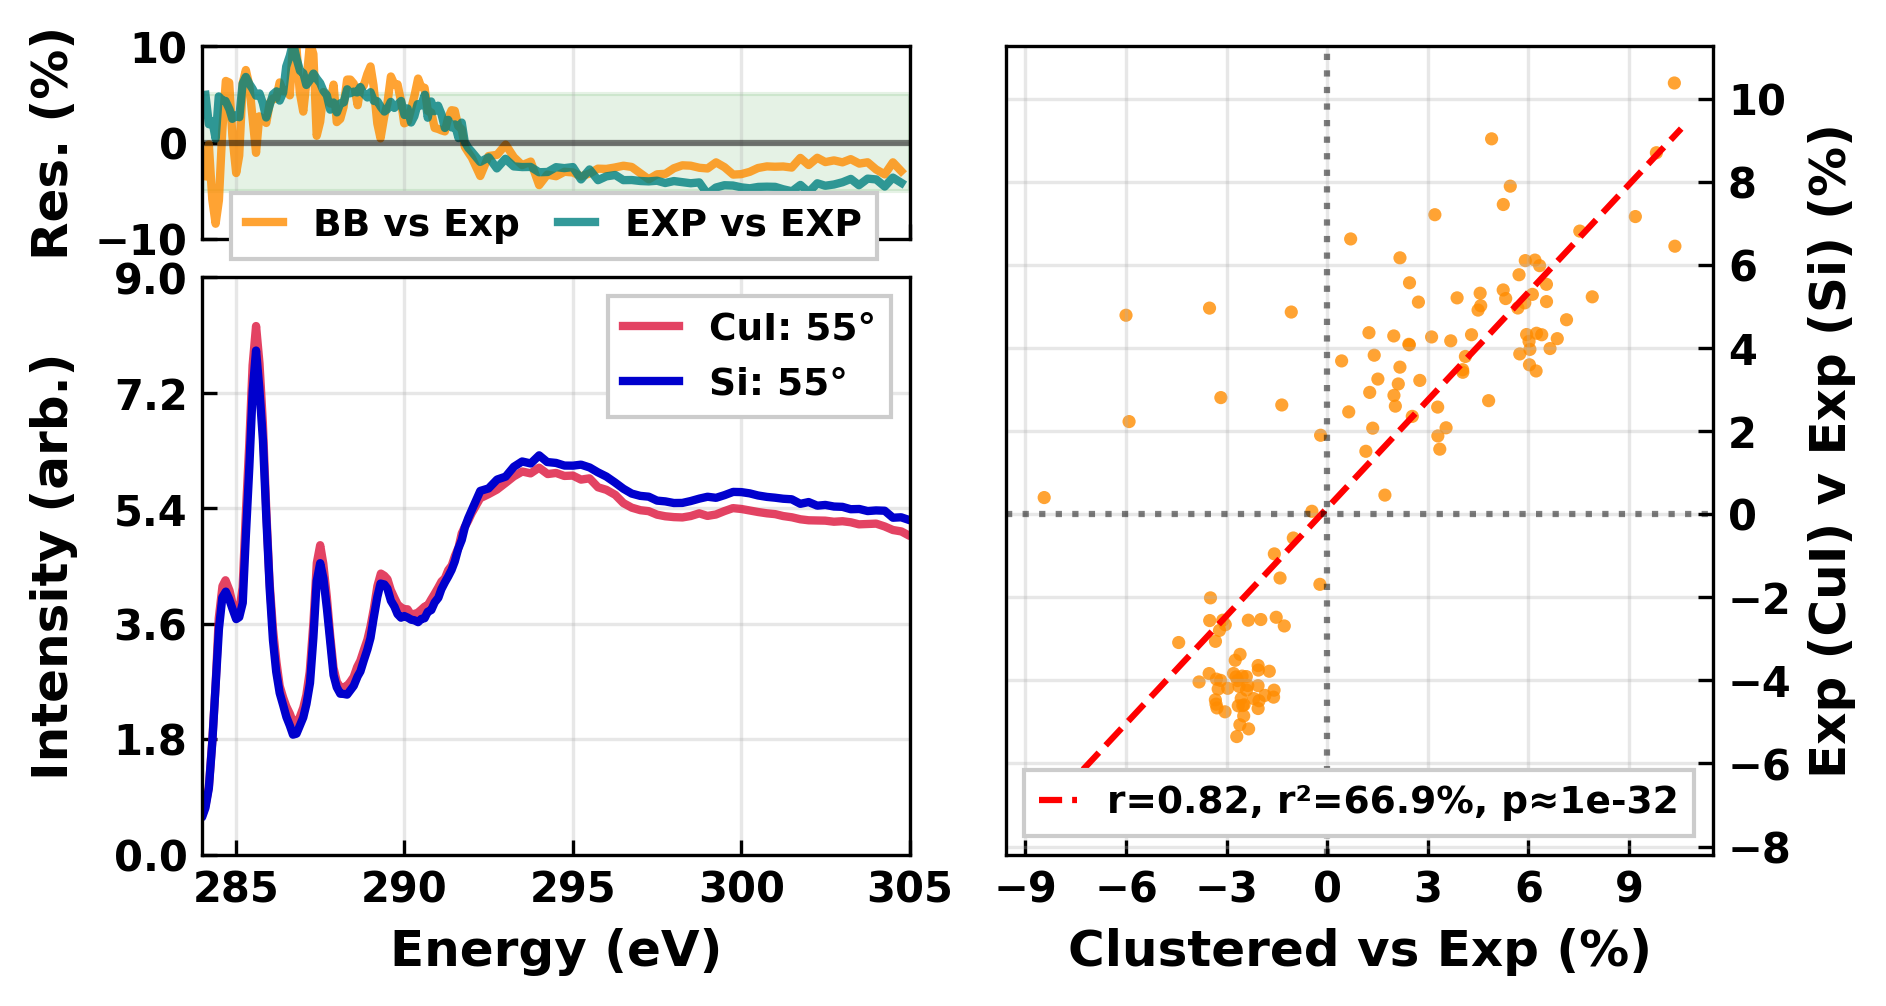

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set consistent plot styling through rcParams
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"

# Create the figure and mosaic axes
# Aim for left panel (data & residuals) to be wider than the right (correlation)
fig = plt.figure(figsize=(6.5, 3.5), dpi=300)

# Layout grid - 2 main panels (left with 2 rows, right spanning rows)
gs = fig.add_gridspec(
    2,  # Number of rows (for the left panel)
    3,  # Number of columns (Left Panel, Spacer, Right Panel)
    height_ratios=[1, 3],  # Relative heights of rows in the left panel
    width_ratios=[1.5, 0.1, 1.5],  # Relative widths: Left panel, spacer, Right panel
    hspace=0.1,  # Height space between rows in left panel
    wspace=0.05,  # Width space between main panels
)

# Axes for the left panel
ax_L_top = fig.add_subplot(gs[0, 0])  # Top-left for residuals
ax_L_bottom = fig.add_subplot(gs[1, 0], sharex=ax_L_top)  # Bottom-left for data

# Axe for the right panel
ax_R = fig.add_subplot(gs[:, 2])  # Spans both rows in the third column (index 2)

# --- Populate Top-Left Plot (ax_L_top, similar to ax1 in CELL 6) ---
# Using current (filtered) residuals_55deg and redisduals_clustered_si
ax_L_top.plot(
    redisduals_clustered_si["energy"],
    redisduals_clustered_si["55"],
    label="BB vs Exp",
    color="darkorange",
    linewidth=2,
    alpha=0.8,
)

# Plot 2: "CuPc |CuI vs Si (Exp vs Exp)"
energy_for_filtered_residuals = df.loc[residuals_55deg.index, "energy"]
ax_L_top.plot(
    energy_for_filtered_residuals,
    residuals_55deg.values,
    label="EXP vs EXP",
    color="teal",
    linewidth=2,
    alpha=0.8,
)

# Styling for ax_L_top
ax_L_top.axhspan(-5, 5, color="green", alpha=0.1, zorder=0)
ax_L_top.set_ylabel("Res. (%)")
ax_L_top.grid(True, alpha=0.3)
ax_L_top.axhline(y=0, color="black", linestyle="-", alpha=0.5)
ax_L_top.set_xlim(284, 305)
ax_L_top.set_ylim(-10, 10)

# Set integer yticks for residual plot

# Hide x-axis label for the top plot
ax_L_top.tick_params(labelbottom=False)

# Add legend
ax_L_top.legend(
    loc="lower right",
    bbox_to_anchor=(0.98, -0.2),
    fontsize=9,
    ncol=2,
    handlelength=1,
    columnspacing=1.0,
    fancybox=False,
    framealpha=1,
)

# RMSE calculation and text
# Define energy range for RMSE
emin_rmse, emax_rmse = 284, 305

# Filter Cui data for the energy range
energy_mask_cui = (df["energy"] >= emin_rmse) & (df["energy"] <= emax_rmse)
cui_55_in_range = df.loc[energy_mask_cui, "55"]

# Filter Si data for the energy range
energy_mask_si = (df_si["energy"] >= emin_rmse) & (df_si["energy"] <= emax_rmse)
si_55_in_range = df_si.loc[energy_mask_si, "55"]

# Find common indices to ensure data points are comparable
common_indices = cui_55_in_range.index.intersection(si_55_in_range.index)

cui_55_common_idx = cui_55_in_range.loc[common_indices]
si_55_common_idx = si_55_in_range.loc[common_indices]

# Ensure no division by zero or NaN issues
valid_mask_for_common = (
    (si_55_common_idx != 0) & ~np.isnan(si_55_common_idx) & ~np.isnan(cui_55_common_idx)
)

cui_55_for_rmse = cui_55_common_idx[valid_mask_for_common]
si_55_for_rmse = si_55_common_idx[valid_mask_for_common]

# --- Populate Bottom-Left Plot (ax_L_bottom) ---
ax_L_bottom.plot(
    df["energy"],
    df["55"] * 1e-4,
    label="CuI: 55°",
    color="crimson",
    linewidth=2,
    alpha=0.8,
)
ax_L_bottom.plot(
    df_si["energy"],
    df_si["55"] * 1e-4,
    label="Si: 55°",
    color="mediumblue",
    linewidth=2,
)

# Styling for data plot
ax_L_bottom.grid(True, alpha=0.3)
ax_L_bottom.set_xlabel("Energy (eV)")
ax_L_bottom.set_ylabel("Intensity (arb.)")

# Add legend for bottom plot
ax_L_bottom.legend(
    loc="best",
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    fancybox=False,
    framealpha=1,
)

# Determine y-axis limits for consistent data display
# Get the maximum intensity across both datasets to set consistent y-limits
max_intensity = max(
    df["55"].max() * 1e-4,
    df_si["55"].max() * 1e-4,
)
# Round up to nearest integer for cleaner limits
y_max = np.ceil(max_intensity)
ax_L_bottom.set_ylim(0, y_max)

# Set integer yticks for the intensity plot
intensity_ticks = np.linspace(0, y_max, 6)  # 6 ticks including 0 and y_max
ax_L_bottom.set_yticks(intensity_ticks)
ax_L_bottom.set_yticklabels([f"{tick:.1f}" for tick in intensity_ticks])

# Set x-axis ticks
ax_L_bottom

# --- Populate Right Plot (ax_R, residual correlation) ---
x_data_raw = redisduals_clustered_si["55"]  # Filtered Pandas Series
y_data_raw = residuals_55deg.values  # Filtered Numpy array

correlation = np.nan  # Default to NaN

# Ensure consistent lengths for initial processing
if len(x_data_raw) != len(y_data_raw):
    x_plot_fit_data = np.array([])
    y_plot_fit_data = np.array([])
else:
    # Clean NaNs for all subsequent operations (correlation, plot, fit)
    valid_indices = ~np.isnan(x_data_raw.values) & ~np.isnan(y_data_raw)
    x_plot_fit_data = x_data_raw.values[valid_indices]  # Numpy array
    y_plot_fit_data = y_data_raw[valid_indices]  # Numpy array

# Calculate correlation coefficient using cleaned data
if len(x_plot_fit_data) > 1:
    correlation_matrix = np.corrcoef(x_plot_fit_data, y_plot_fit_data)
    correlation = correlation_matrix[0, 1]

# Plot scatter using cleaned data
ax_R.scatter(
    x_plot_fit_data,
    y_plot_fit_data,
    marker="o",
    color="darkorange",
    alpha=0.8,
    s=10,  # Control point size
    edgecolors="none",  # No edge color for cleaner appearance
)

# Calculate and plot line of best fit using cleaned data
if len(x_plot_fit_data) > 1:
    m, b = np.polyfit(x_plot_fit_data, y_plot_fit_data, 1)

    # Create x_line based on the range of data actually used for fitting
    x_line_min = np.min(x_plot_fit_data)
    x_line_max = np.max(x_plot_fit_data)

    if x_line_min != x_line_max:
        # Extend line slightly beyond data range for visual clarity
        x_range = x_line_max - x_line_min
        x_line = np.array([x_line_min - 0.01 * x_range, x_line_max + 0.01 * x_range])

        pearson_r, percent_correlated, p_value = calculate_correlation_stats(
            x_plot_fit_data, y_plot_fit_data
        )

        ax_R.plot(
            x_line,
            m * x_line + b,
            color="red",
            linestyle="--",
            label=f"r={pearson_r:.2f}, r²={percent_correlated:.1f}%, p≈{p_value:1.0e}",
            linewidth=1.5,
        )
ax_R.legend(
    # loc = "upper center",
    fontsize=9,
    ncol=2,
    handlelength=1,
    columnspacing=1.0,
    fancybox=False,
    framealpha=1,
)

# Styling for correlation plot
ax_R.yaxis.set_label_position("right")
ax_R.tick_params(
    axis="y", which="both", left=False, right=True, labelleft=False, labelright=True
)

# Set x and y limits to be symmetric around zero and equal
max_abs_val = max(np.abs(np.concatenate([x_plot_fit_data, y_plot_fit_data])).max(), 10)
# Round to nearest integer for cleaner limits and ensure minimum range of ±10
max_abs_val = max(10, np.ceil(max_abs_val))

# Set integer ticks for both axes
ax_R.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax_R.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax_R.set_xlabel("Clustered vs Exp (%)")
ax_R.set_ylabel("Exp (CuI) v Exp (Si) (%)")
ax_R.grid(True, alpha=0.3)
ax_R.axhline(0, color="k", linestyle=":", alpha=0.5)
ax_R.axvline(0, color="k", linestyle=":", alpha=0.5)

# --- Final Figure Adjustments ---
fig.align_ylabels([ax_L_top, ax_L_bottom])  # Align y-labels of left panels
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig(
    "nexafs_comparison_with_si.svg",
    bbox_inches="tight",
    format="svg",
    dpi=300,
    transparent=True,
)

In [15]:
energy_mask = (df["energy"] >= 284) & (df["energy"] <= 305)
energy_mask_si = (df_si["energy"] >= 284) & (df_si["energy"] <= 305)
df_filtered = df[energy_mask].copy()
df_filtered_si = df_si[energy_mask_si].copy()
energy_filtered = df_filtered["energy"].to_numpy()
energy_filtered_si = df_filtered_si["energy"].to_numpy()
residuals_filtered = residuals[energy_mask].copy()
residuals_filtered_si = residuals_si[energy_mask_si].copy()
fitted_filtered = df_fitted[energy_mask].copy()
fitted_filtered_si = df_fitted_si[energy_mask_si].copy()

In [28]:
optimal_df = pd.DataFrame(optimal, columns=["energy", "slope", "intercept"])
optimal_df_si = pd.DataFrame(optimal_si, columns=["energy", "slope", "intercept"])
# slice to only include energies between 284 and 305 eV
optimal_df = optimal_df[(optimal_df["energy"] >= 284.2) & (optimal_df["energy"] <= 300)]
optimal_df_si = optimal_df_si[
    (optimal_df_si["energy"] >= 284.2) & (optimal_df_si["energy"] <= 300)
]

# grab the closest points in the energy list to these values
target_max_positive = 285.61
target_max_negative = 298.437

# Find closest energies in the dataset
energy_array = optimal_df["energy"].values
closest_positive_idx = np.argmin(np.abs(energy_array - target_max_positive))
closest_negative_idx = np.argmin(np.abs(energy_array - target_max_negative))

max_positive_slope_energy = energy_array[closest_positive_idx]
max_negative_slope_energy = energy_array[closest_negative_idx]
print(f"Max positive slope energy: {max_positive_slope_energy:.2f}")
print(f"Max negative slope energy: {max_negative_slope_energy:.2f}")

Max positive slope energy: 285.60
Max negative slope energy: 298.50


/tmp/ipykernel_22337/2867289592.py:393: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


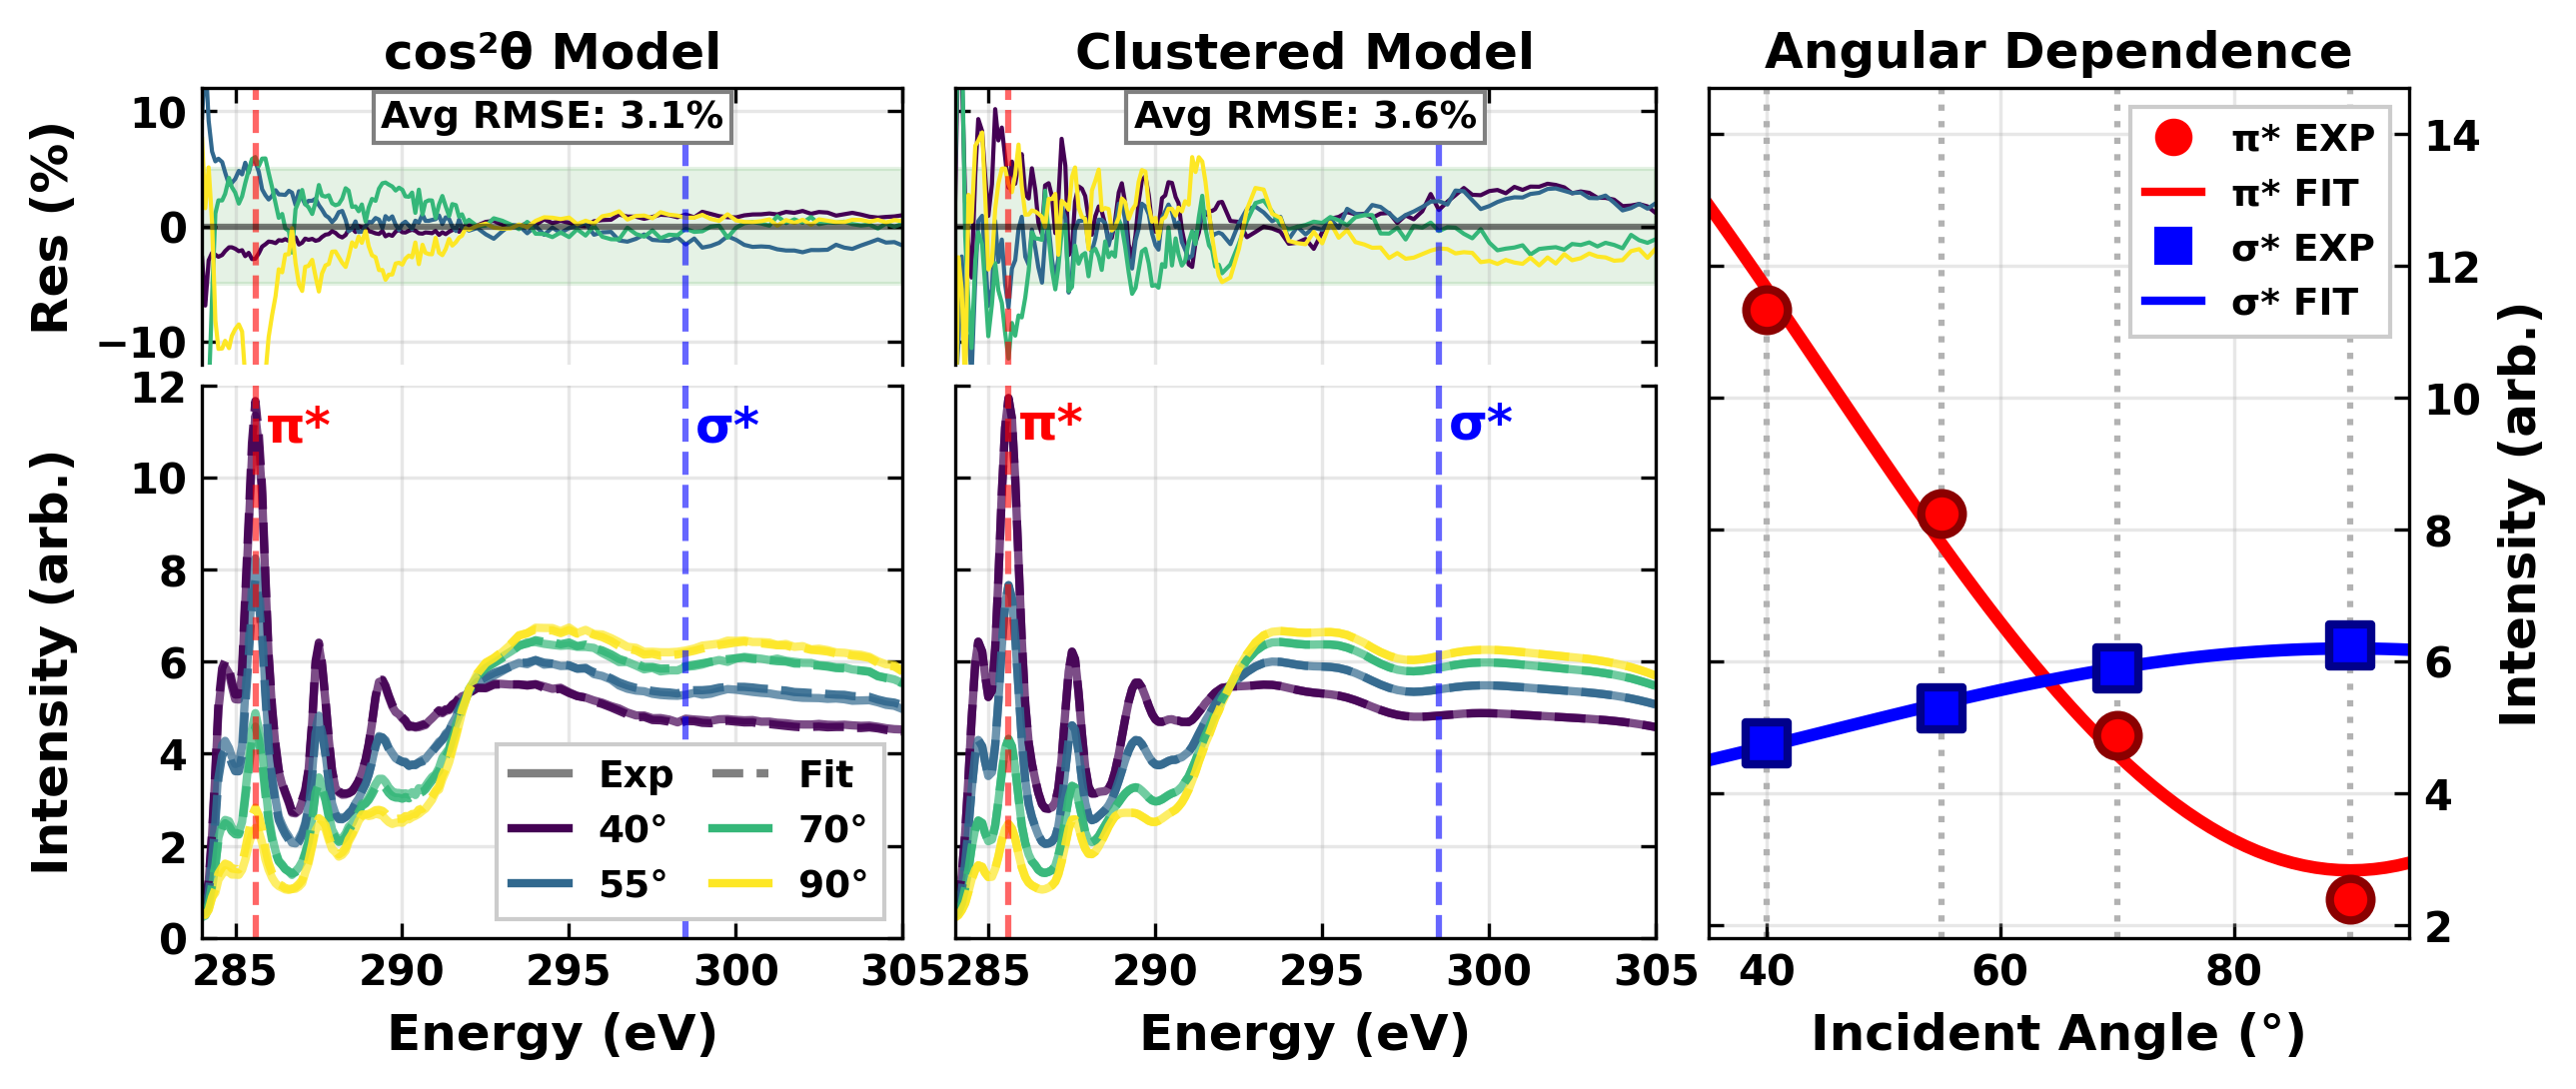

In [20]:
# Enhanced version with angular dependence plot added to the right
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"

# Create figure with expanded layout for angular dependence panel
fig = plt.figure(figsize=(9.5, 3.5), dpi=300)

# Layout grid - reduced wspace to minimize white space between panels
gs = fig.add_gridspec(
    2,
    5,
    height_ratios=[1.5, 3],
    width_ratios=[2, 0.1, 2, 0.1, 2],
    hspace=0.05,
    wspace=0.02,
)

# Create the axes
ax_residuals = fig.add_subplot(gs[0, 0])
ax_data = fig.add_subplot(gs[1, 0], sharex=ax_residuals)
ax_residuals_hdf = fig.add_subplot(gs[0, 2], sharex=ax_residuals)
ax_data_hdf = fig.add_subplot(gs[1, 2], sharex=ax_residuals_hdf)
ax_angular = fig.add_subplot(gs[:, 4])

# Filter data to energy range 284-305 eV
energy_mask = (df["energy"] >= 284) & (df["energy"] <= 305)
df_filtered = df[energy_mask].copy()
df_fitted_filtered = df_fitted[energy_mask].copy()
energy_filtered = df_filtered["energy"].to_numpy()
residuals_filtered = residuals[energy_mask].copy()
residuals_clustered_filtered = redisduals_clustered[energy_mask].copy()

# Calculate RMSE values
rmse_cos_fit = {}
rmse_hdf_fit = {}
for angle in incident_angles:
    rmse_cos_fit[angle] = np.sqrt(np.mean(residuals_filtered[f"{angle}"] ** 2))
    rmse_hdf_fit[angle] = np.sqrt(
        np.mean(residuals_clustered_filtered[f"{angle}"] ** 2)
    )

avg_rmse_cos = np.mean(list(rmse_cos_fit.values()))
avg_rmse_hdf = np.mean(list(rmse_hdf_fit.values()))

# Colors for different angles
colors = plt.cm.viridis(np.linspace(0, 1, len(incident_angles)))

# Setup residual panels
for ax, residuals_data, title, avg_rmse in [
    (ax_residuals, residuals_filtered, "cos²θ Model", avg_rmse_cos),
    (ax_residuals_hdf, residuals_clustered_filtered, "Clustered Model", avg_rmse_hdf),
]:
    # Add shading for good fit region
    ax.axhspan(-5, 5, color="green", alpha=0.1, zorder=0)

    # Plot residuals for each angle
    for i, angle in enumerate(incident_angles):
        ax.plot(
            residuals_data["energy"],
            residuals_data[f"{angle}"],
            color=colors[i],
            linewidth=1,
            markersize=2,
        )

    # Highlight key energies
    ax.axvline(
        x=max_positive_slope_energy,
        color="red",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )
    ax.axvline(
        x=max_negative_slope_energy,
        color="blue",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )

    # Configure axis appearance
    ax.tick_params(
        axis="both", which="both", bottom=False, top=True, labelbottom=False, right=True
    )
    ax.spines["bottom"].set_visible(False)

    # Add title and RMSE info
    ax.set_title(title, fontweight="bold", pad=5)
    ax.text(
        294.5,
        9.5,
        f"Avg RMSE: {avg_rmse:.1f}%",
        fontsize=9,
        ha="center",
        va="center",
        bbox=dict(
            facecolor="white", alpha=1.0, boxstyle="square,pad=0.2", edgecolor="gray"
        ),
    )

    # Common settings
    ax.set_ylim(-12, 12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="black", linestyle="-", alpha=0.5)

# Add y-label only to left residual panel
ax_residuals.set_ylabel("Res (%)")
ax_residuals_hdf.set_yticklabels([])


# Define function to plot data
def plot_data(ax, df_data, is_cos_fit=True):
    # Plot experimental data for each angle
    for i, angle in enumerate(incident_angles):
        ax.plot(
            df_data["energy"],
            df_data[f"{angle}"] * 1e-4,  # Scale by 1e-4
            color=colors[i],
            linewidth=2,
            linestyle="-",
            alpha=0.7,
            label=f"Exp {angle}°",
        )

    # Create and plot fitted data
    if is_cos_fit:
        # Plot cos² fitted data
        for i, angle in enumerate(incident_angles):
            cos_angle = np.cos(np.radians(angle)) ** 2
            fitted_intensities = []

            for e in energy_filtered:
                opt_params = next(
                    (params for params in optimal if params[0] == e), None
                )
                if opt_params:
                    a, b = opt_params[1], opt_params[2]
                    fitted_intensities.append(linear_fit(cos_angle, a, b) * 1e-4)
                else:
                    fitted_intensities.append(np.nan)

            # Plot fitted data with dashed lines
            ax.plot(
                energy_filtered,
                fitted_intensities,
                color=colors[i],
                linewidth=2,
                linestyle="--",
                alpha=0.9,
                label=f"Fit {angle}°",
            )
    else:
        # For HDF5 data, the fit is already in df_fitted
        for i, angle in enumerate(incident_angles):
            ax.plot(
                df_data["energy"],
                df_data[f"{angle}"] * 1e-4,  # Scale by 1e-4
                color=colors[i],
                linewidth=2,
                linestyle="--",
                alpha=0.9,
                label=f"Fit {angle}°",
            )

    # Highlight the π* and σ* energies
    ax.axvline(
        x=max_positive_slope_energy,
        color="red",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )
    ax.axvline(
        x=max_negative_slope_energy,
        color="blue",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )

    # Add π* and σ* labels
    ymax = ax.get_ylim()[1]
    ax.text(
        max_positive_slope_energy + 0.3,
        ymax * 0.95,
        "π*",
        color="red",
        fontweight="bold",
        fontsize=12,
        verticalalignment="top",
    )
    ax.text(
        max_negative_slope_energy + 0.3,
        ymax * 0.95,
        "σ*",
        color="blue",
        fontsize=12,
        fontweight="bold",
        verticalalignment="top",
    )

    # Configure spine visibility
    ax.spines["top"].set_visible(False)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(284, 305)


# Plot data in both panels
plot_data(ax_data, df_filtered, is_cos_fit=True)
plot_data(ax_data_hdf, df_fitted_filtered, is_cos_fit=False)

# Set axis labels
ax_data.set_ylabel("Intensity (arb.)")
ax_data_hdf.set_ylabel("")

# Set x-axis labels
ax_data.set_xlabel("Energy (eV)", fontsize=12)
ax_data_hdf.set_xlabel("Energy (eV)", fontsize=12)

# Set x-axis ticks and labels
energy_ticks = np.arange(285, 306, 5)
ax_data.set_xticks(energy_ticks)
ax_data.set_xticklabels([f"{int(e)}" for e in energy_ticks])
ax_data.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

# Set x-axis ticks for right panel
ax_data_hdf.set_xticks(energy_ticks)
ax_data_hdf.set_xticklabels([f"{int(e)}" for e in energy_ticks])
ax_data_hdf.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

# Set y-axis ticks and labels
intensity_ticks = np.linspace(0, 12, 7)
ax_data.set_yticks(intensity_ticks)
ax_data.set_yticklabels([f"{tick:.0f}" for tick in intensity_ticks])
ax_data.tick_params(axis="y", which="both", right=True, labelleft=True)

# Set y-axis ticks for right panel (no labels)
ax_data_hdf.set_ylim(0, 12)  # Ensure same y-limits as left panel
ax_data_hdf.set_yticks(intensity_ticks)
ax_data_hdf.set_yticklabels([])
ax_data_hdf.tick_params(axis="y", which="both", right=True, labelright=False)

# Set y-axis limits
ax_data.set_ylim(0, 12)

# Create legend for data panels
legend_elements = []
for i, angle in enumerate(incident_angles):
    if i == 0:
        legend_elements.append(
            Line2D([0], [0], color="gray", linestyle="-", lw=2, label="Exp")
        )
    elif i == len(incident_angles) // 2:
        legend_elements.append(
            Line2D([0], [0], color="gray", linestyle="--", lw=2, label="Fit")
        )
    legend_elements.append(Line2D([0], [0], color=colors[i], lw=2, label=f"{angle}°"))

# Add legend to left data panel
ax_data.legend(
    handles=legend_elements,
    loc="lower right",
    fontsize=9,
    ncol=2,
    handlelength=1.5,
    columnspacing=1.0,
    title_fontsize=10,
    fancybox=False,
    framealpha=1,
)

# ======================
# Angular Dependence Panel
# ======================

# Get data for extreme slope energies
max_pos_data = df[df["energy"] == max_positive_slope_energy]
max_neg_data = df[df["energy"] == max_negative_slope_energy]

# Get corresponding fits
max_pos_params = next(
    (params for params in optimal if params[0] == max_positive_slope_energy), None
)
max_neg_params = next(
    (params for params in optimal if params[0] == max_negative_slope_energy), None
)

# Create angular data
cos_x = np.cos(np.radians(incident_angles)) ** 2
fine_angles = np.arange(30, 100, 1)
fine_cos_x = np.cos(np.radians(fine_angles)) ** 2

# Plot positive slope energy data and fit
max_pos_intensities = [
    max_pos_data[f"{angle}"].values[0] * 1e-4 for angle in incident_angles
]
ax_angular.scatter(
    incident_angles,
    max_pos_intensities,
    c="red",
    s=100,
    label=f"π* {max_positive_slope_energy:.1f} eV",
    marker="o",
    zorder=5,
    edgecolors="darkred",
    linewidth=2,
)
if max_pos_params:
    fit_pos = linear_fit(fine_cos_x, max_pos_params[1], max_pos_params[2]) * 1e-4
    ax_angular.plot(
        fine_angles,
        fit_pos,
        "r-",
        linewidth=3,
        label="π* fit",
    )

# Plot negative slope energy data and fit
max_neg_intensities = [
    max_neg_data[f"{angle}"].values[0] * 1e-4 for angle in incident_angles
]
ax_angular.scatter(
    incident_angles,
    max_neg_intensities,
    c="blue",
    s=100,
    label=f"σ* {max_negative_slope_energy:.1f} eV",
    marker="s",
    zorder=5,
    edgecolors="darkblue",
    linewidth=2,
)
if max_neg_params:
    fit_neg = linear_fit(fine_cos_x, max_neg_params[1], max_neg_params[2]) * 1e-4
    ax_angular.plot(
        fine_angles,
        fit_neg,
        "b-",
        linewidth=3,
        label="σ* fit",
    )

# Highlight the experimental angles
for angle in incident_angles:
    ax_angular.axvline(x=angle, color="gray", linestyle=":", alpha=0.6, zorder=1)

ax_angular.set_xlabel("Incident Angle (°)", fontsize=12)

# Move y-label to the right side
ax_angular.yaxis.set_label_position("right")
ax_angular.set_ylabel("Intensity (arb.)", fontsize=12)
ax_angular.tick_params(
    axis="y", which="both", left=True, right=True, labelleft=False, labelright=True
)

ax_angular.set_title("Angular Dependence", fontweight="bold", pad=5)

# Create legend for angular panel
angular_legend_elements = [
    Line2D(
        [0], [0], color="red", marker="o", markersize=8, linestyle="", label="π* EXP"
    ),
    Line2D([0], [0], color="red", linestyle="-", linewidth=2, label="π* FIT"),
    Line2D(
        [0], [0], color="blue", marker="s", markersize=8, linestyle="", label="σ* EXP"
    ),
    Line2D([0], [0], color="blue", linestyle="-", linewidth=2, label="σ* FIT"),
]

ax_angular.legend(
    handles=angular_legend_elements,
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    columnspacing=1.0,
    title_fontsize=10,
    fancybox=False,
    framealpha=1,
    loc="upper right",
)

ax_angular.grid(True, alpha=0.3)
ax_angular.set_xlim(35, 95)
ax_angular.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

# Final layout adjustments
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.05)
plt.show()

fig.savefig(
    "nexafs_angular_dependence.svg",
    bbox_inches="tight",
    format="svg",
    dpi=300,
    transparent=True,
)

/tmp/ipykernel_22337/2642911720.py:583: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


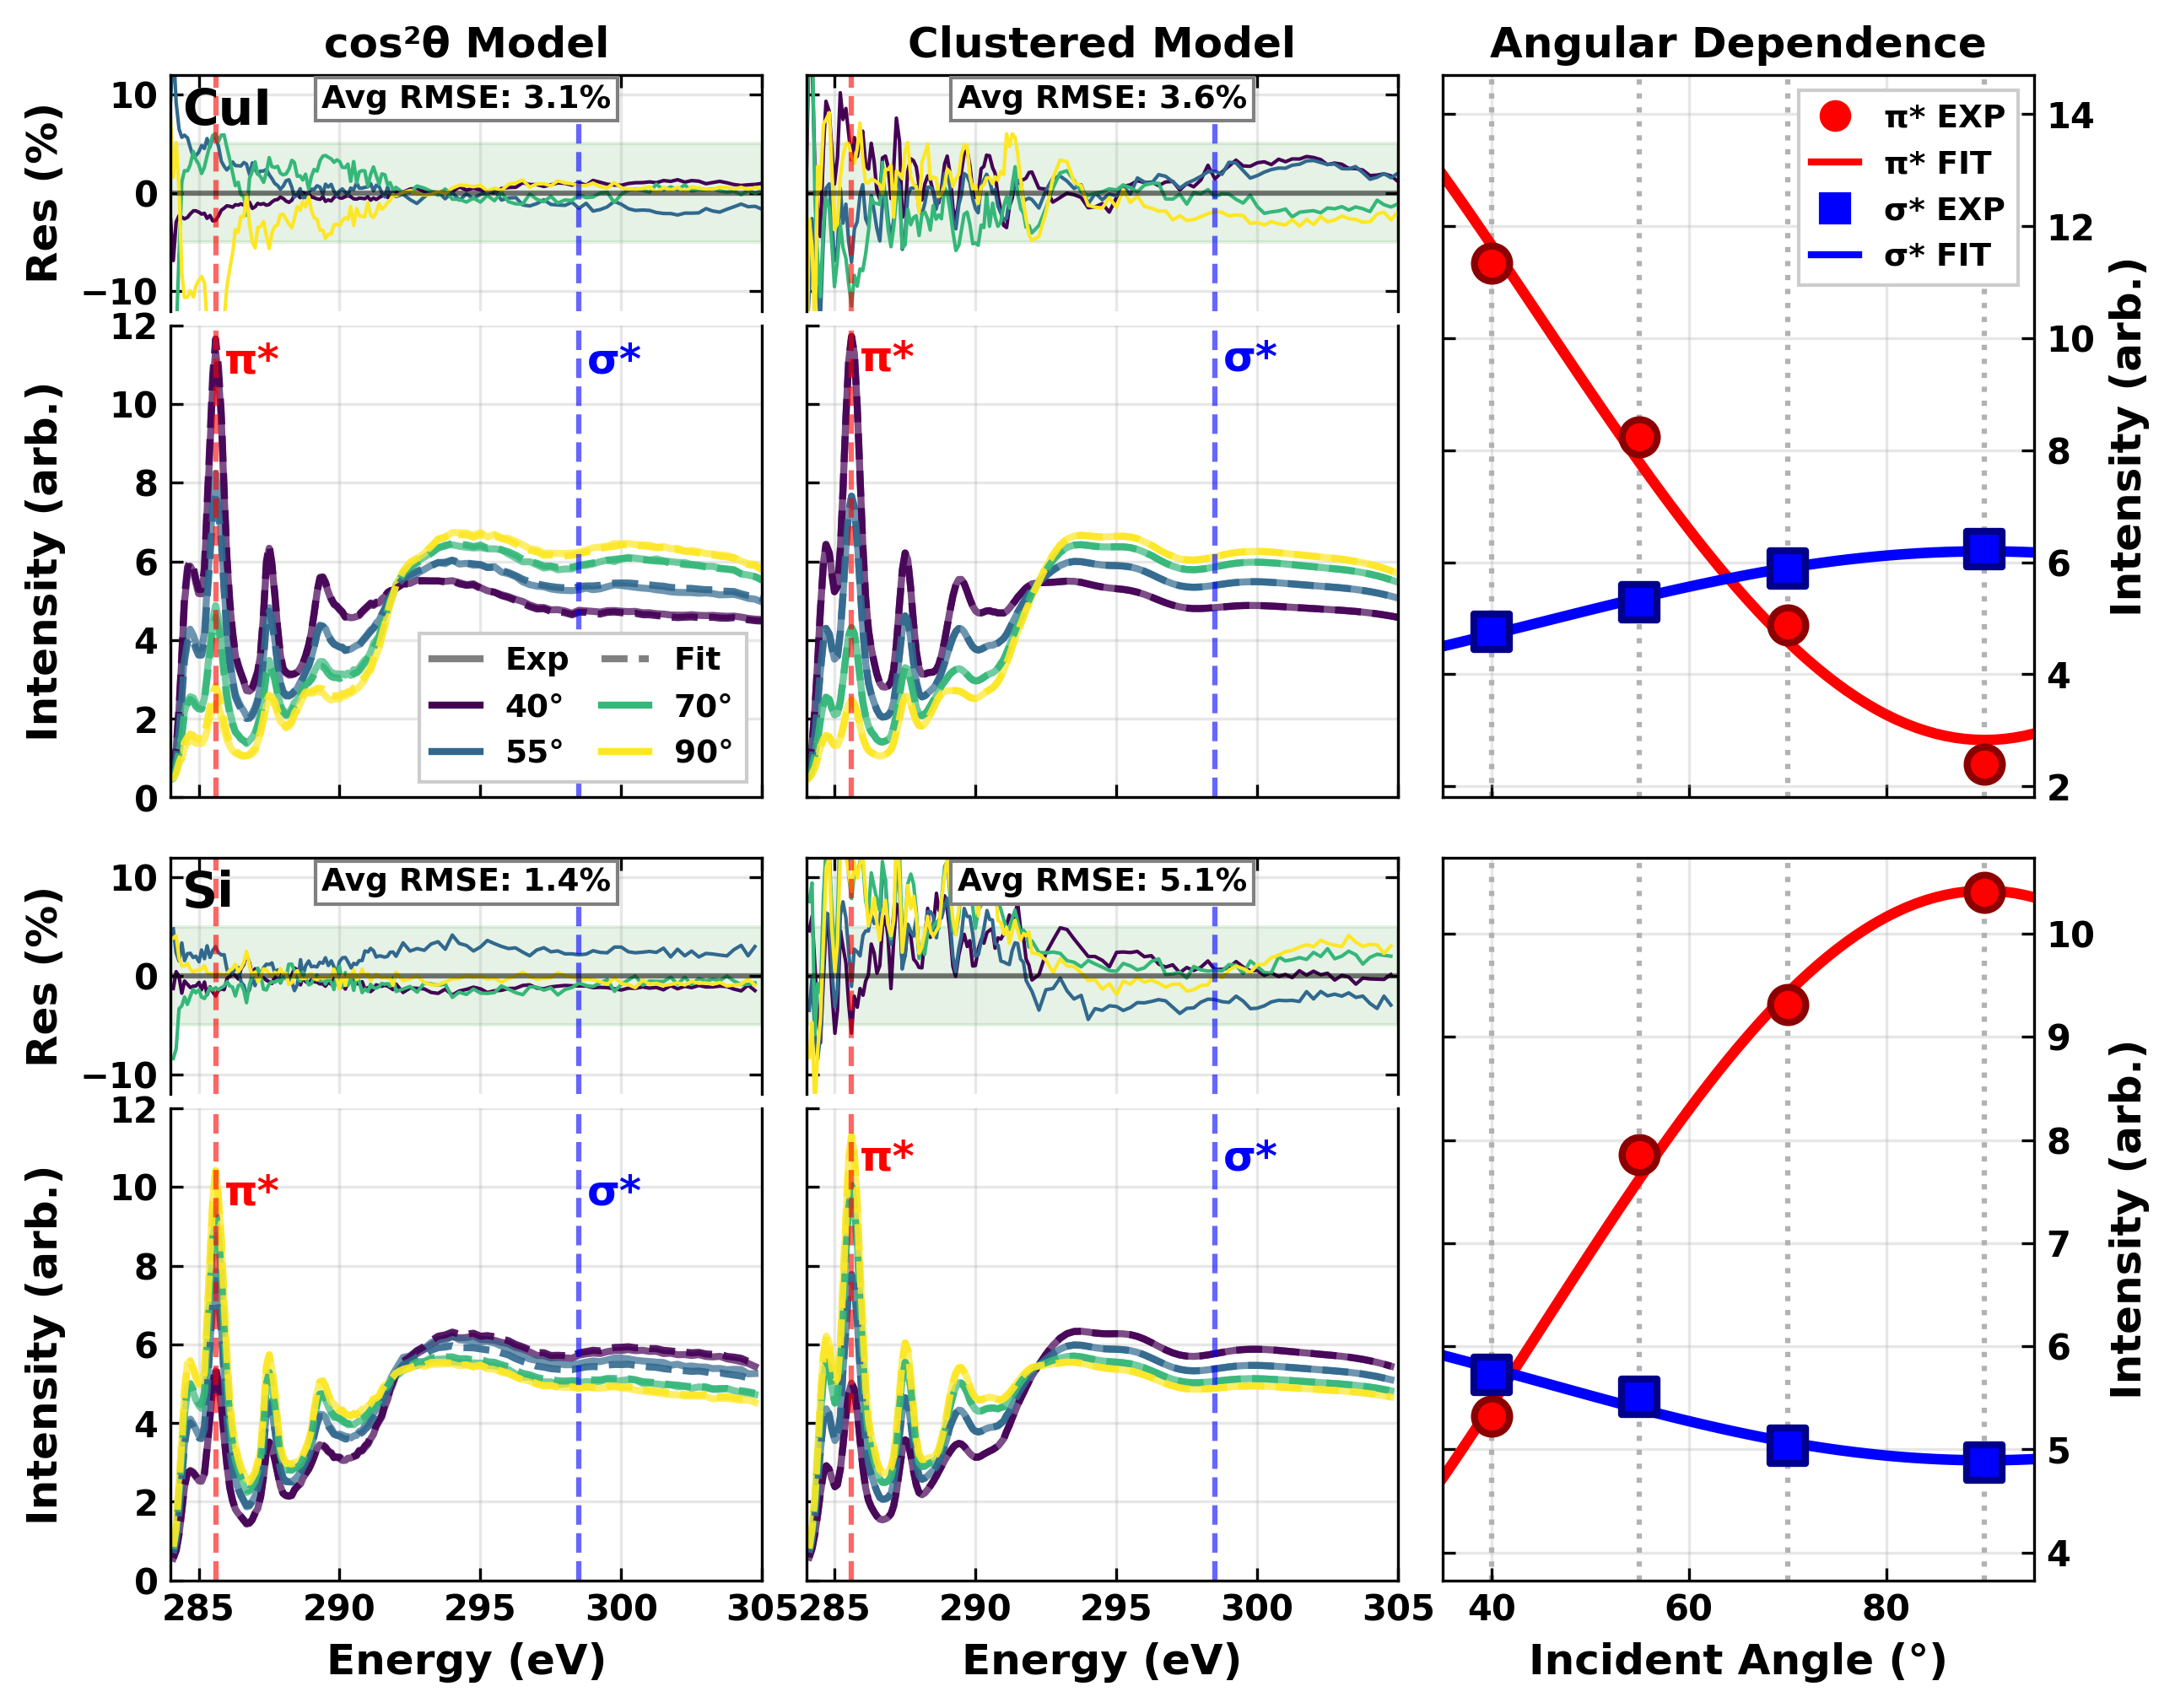

In [68]:
# Enhanced version with Si data panels added below
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"

# Create figure with expanded layout for Si data panels
fig = plt.figure(figsize=(9.5, 7), dpi=300)

# Layout grid - 4 rows for CuI residuals, CuI data, Si residuals, Si data
gs = fig.add_gridspec(
    5,
    5,
    height_ratios=[1.5, 3, 0.2, 1.5, 3],
    width_ratios=[2, 0.1, 2, 0.1, 2],
    hspace=0.05,
    wspace=0.02,
)

# Create the axes - CuI panels
ax_residuals = fig.add_subplot(gs[0, 0])
ax_data = fig.add_subplot(gs[1, 0], sharex=ax_residuals)
ax_residuals_hdf = fig.add_subplot(gs[0, 2], sharex=ax_residuals)
ax_data_hdf = fig.add_subplot(gs[1, 2], sharex=ax_residuals_hdf)
ax_angular = fig.add_subplot(gs[:2, 4])

# Create the axes - Si panels
ax_residuals_si = fig.add_subplot(gs[3, 0], sharex=ax_residuals)
ax_data_si = fig.add_subplot(gs[4, 0], sharex=ax_residuals)
ax_residuals_hdf_si = fig.add_subplot(gs[3, 2], sharex=ax_residuals_hdf)
ax_data_hdf_si = fig.add_subplot(gs[4, 2], sharex=ax_residuals_hdf)
ax_angular_si = fig.add_subplot(gs[3:, 4])

# Filter data to energy range 284-305 eV for CuI
energy_mask = (df["energy"] >= 284) & (df["energy"] <= 305)
df_filtered = df[energy_mask].copy()
df_fitted_filtered = df_fitted[energy_mask].copy()
energy_filtered = df_filtered["energy"].to_numpy()
residuals_filtered = residuals[energy_mask].copy()
residuals_clustered_filtered = redisduals_clustered[energy_mask].copy()

# Filter data to energy range 284-305 eV for Si
energy_mask_si = (df_si["energy"] >= 284) & (df_si["energy"] <= 305)
df_filtered_si = df_si[energy_mask_si].copy()
df_fitted_filtered_si = df_fitted_si[energy_mask_si].copy()
energy_filtered_si = df_filtered_si["energy"].to_numpy()
residuals_filtered_si = residuals_si[energy_mask_si].copy()
residuals_clustered_filtered_si = redisduals_clustered_si[energy_mask_si].copy()

# Calculate RMSE values for CuI
rmse_cos_fit = {}
rmse_hdf_fit = {}
for angle in incident_angles:
    rmse_cos_fit[angle] = np.sqrt(np.mean(residuals_filtered[f"{angle}"] ** 2))
    rmse_hdf_fit[angle] = np.sqrt(
        np.mean(residuals_clustered_filtered[f"{angle}"] ** 2)
    )

avg_rmse_cos = np.mean(list(rmse_cos_fit.values()))
avg_rmse_hdf = np.mean(list(rmse_hdf_fit.values()))

# Calculate RMSE values for Si
rmse_cos_fit_si = {}
rmse_hdf_fit_si = {}
for angle in incident_angles:
    rmse_cos_fit_si[angle] = np.sqrt(np.mean(residuals_filtered_si[f"{angle}"] ** 2))
    rmse_hdf_fit_si[angle] = np.sqrt(
        np.mean(residuals_clustered_filtered_si[f"{angle}"] ** 2)
    )

avg_rmse_cos_si = np.mean(list(rmse_cos_fit_si.values()))
avg_rmse_hdf_si = np.mean(list(rmse_hdf_fit_si.values()))

# Colors for different angles
colors = plt.cm.viridis(np.linspace(0, 1, len(incident_angles)))

# Setup residual panels for CuI
for ax, residuals_data, title, avg_rmse in [
    (ax_residuals, residuals_filtered, "cos²θ Model", avg_rmse_cos),
    (ax_residuals_hdf, residuals_clustered_filtered, "Clustered Model", avg_rmse_hdf),
]:
    # Add shading for good fit region
    ax.axhspan(-5, 5, color="green", alpha=0.1, zorder=0)

    # Plot residuals for each angle
    for i, angle in enumerate(incident_angles):
        ax.plot(
            residuals_data["energy"],
            residuals_data[f"{angle}"],
            color=colors[i],
            linewidth=1,
            markersize=2,
        )

    # Highlight key energies
    ax.axvline(
        x=max_positive_slope_energy,
        color="red",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )
    ax.axvline(
        x=max_negative_slope_energy,
        color="blue",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )

    # Configure axis appearance
    ax.tick_params(
        axis="both", which="both", bottom=False, top=True, labelbottom=False, right=True
    )
    ax.spines["bottom"].set_visible(False)

    # Add title and RMSE info
    ax.set_title(title, fontweight="bold", pad=5)
    ax.text(
        294.5,
        9.5,
        f"Avg RMSE: {avg_rmse:.1f}%",
        fontsize=9,
        ha="center",
        va="center",
        bbox=dict(
            facecolor="white", alpha=1.0, boxstyle="square,pad=0.2", edgecolor="gray"
        ),
    )

    # Common settings
    ax.set_ylim(-12, 12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="black", linestyle="-", alpha=0.5)

# Setup residual panels for Si
for ax, residuals_data, avg_rmse in [
    (ax_residuals_si, residuals_filtered_si, avg_rmse_cos_si),
    (ax_residuals_hdf_si, residuals_clustered_filtered_si, avg_rmse_hdf_si),
]:
    # Add shading for good fit region
    ax.axhspan(-5, 5, color="green", alpha=0.1, zorder=0)

    # Plot residuals for each angle
    for i, angle in enumerate(incident_angles):
        ax.plot(
            residuals_data["energy"],
            residuals_data[f"{angle}"],
            color=colors[i],
            linewidth=1,
            markersize=2,
        )

    # Highlight key energies
    ax.axvline(
        x=max_positive_slope_energy,
        color="red",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )
    ax.axvline(
        x=max_negative_slope_energy,
        color="blue",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )

    # Configure axis appearance
    ax.tick_params(
        axis="both", which="both", bottom=False, top=True, labelbottom=False, right=True
    )
    ax.spines["bottom"].set_visible(False)

    # Add RMSE info
    ax.text(
        294.5,
        9.5,
        f"Avg RMSE: {avg_rmse:.1f}%",
        fontsize=9,
        ha="center",
        va="center",
        bbox=dict(
            facecolor="white", alpha=1.0, boxstyle="square,pad=0.2", edgecolor="gray"
        ),
    )

    # Common settings
    ax.set_ylim(-12, 12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="black", linestyle="-", alpha=0.5)

# Add y-labels only to left residual panels
ax_residuals.set_ylabel("Res (%)")
ax_residuals_hdf.set_yticklabels([])
ax_residuals_si.set_ylabel("Res (%)")
ax_residuals_hdf_si.set_yticklabels([])


# Define function to plot data
def plot_data(ax, df_data, optimal_data, is_cos_fit=True):
    # Plot experimental data for each angle
    for i, angle in enumerate(incident_angles):
        ax.plot(
            df_data["energy"],
            df_data[f"{angle}"] * 1e-4,  # Scale by 1e-4
            color=colors[i],
            linewidth=2,
            linestyle="-",
            alpha=0.7,
            label=f"Exp {angle}°",
        )

    # Create and plot fitted data
    if is_cos_fit:
        # Plot cos² fitted data
        for i, angle in enumerate(incident_angles):
            cos_angle = np.cos(np.radians(angle)) ** 2
            fitted_intensities = []

            for e in df_data["energy"]:
                opt_params = next(
                    (params for params in optimal_data if params[0] == e), None
                )
                if opt_params:
                    a, b = opt_params[1], opt_params[2]
                    fitted_intensities.append(linear_fit(cos_angle, a, b) * 1e-4)
                else:
                    fitted_intensities.append(np.nan)

            # Plot fitted data with dashed lines
            ax.plot(
                df_data["energy"],
                fitted_intensities,
                color=colors[i],
                linewidth=2,
                linestyle="--",
                alpha=0.9,
                label=f"Fit {angle}°",
            )
    else:
        # For HDF5 data, the fit is already in df_fitted
        for i, angle in enumerate(incident_angles):
            ax.plot(
                df_data["energy"],
                df_data[f"{angle}"] * 1e-4,  # Scale by 1e-4
                color=colors[i],
                linewidth=2,
                linestyle="--",
                alpha=0.9,
                label=f"Fit {angle}°",
            )

    # Highlight the π* and σ* energies
    ax.axvline(
        x=max_positive_slope_energy,
        color="red",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )
    ax.axvline(
        x=max_negative_slope_energy,
        color="blue",
        linestyle="--",
        linewidth=1.5,
        alpha=0.6,
    )

    # Add π* and σ* labels
    ymax = ax.get_ylim()[1]
    ax.text(
        max_positive_slope_energy + 0.3,
        ymax * 0.95,
        "π*",
        color="red",
        fontweight="bold",
        fontsize=12,
        verticalalignment="top",
    )
    ax.text(
        max_negative_slope_energy + 0.3,
        ymax * 0.95,
        "σ*",
        color="blue",
        fontsize=12,
        fontweight="bold",
        verticalalignment="top",
    )

    # Configure spine visibility
    ax.spines["top"].set_visible(False)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(284, 305)


# Plot CuI data in both panels
plot_data(ax_data, df_filtered, optimal, is_cos_fit=True)
plot_data(ax_data_hdf, df_fitted_filtered, optimal, is_cos_fit=False)

# Plot Si data in both panels
plot_data(ax_data_si, df_filtered_si, optimal_si, is_cos_fit=True)
plot_data(ax_data_hdf_si, df_fitted_filtered_si, optimal_si, is_cos_fit=False)

# Set axis labels for CuI panels
ax_data.set_ylabel("Intensity (arb.)")
ax_data_hdf.set_ylabel("")

# Set axis labels for Si panels
ax_data_si.set_ylabel("Intensity (arb.)")
ax_data_hdf_si.set_ylabel("")

# Set x-axis labels for bottom panels
ax_data_si.set_xlabel("Energy (eV)", fontsize=12)
ax_data_hdf_si.set_xlabel("Energy (eV)", fontsize=12)

# Set x-axis ticks and labels
energy_ticks = np.arange(285, 306, 5)
for ax in [ax_data_si, ax_data_hdf_si]:
    ax.set_xticks(energy_ticks)
    ax.set_xticklabels([f"{int(e)}" for e in energy_ticks])
    ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

# Set y-axis ticks and labels
intensity_ticks = np.linspace(0, 12, 7)
for ax in [ax_data, ax_data_hdf, ax_data_si, ax_data_hdf_si]:
    ax.set_ylim(0, 12)
    ax.set_yticks(intensity_ticks)

ax_data.set_yticklabels([f"{tick:.0f}" for tick in intensity_ticks])
ax_data_hdf.set_yticklabels([])
ax_data_si.set_yticklabels([f"{tick:.0f}" for tick in intensity_ticks])
ax_data_hdf_si.set_yticklabels([])

# Add panel labels
ax_residuals.text(
    0.02,
    0.95,
    "CuI",
    transform=ax_residuals.transAxes,
    fontsize=14,
    fontweight="bold",
    va="top",
)
ax_residuals_si.text(
    0.02,
    0.95,
    "Si",
    transform=ax_residuals_si.transAxes,
    fontsize=14,
    fontweight="bold",
    va="top",
)

# Create legend for data panels
legend_elements = []
for i, angle in enumerate(incident_angles):
    if i == 0:
        legend_elements.append(
            Line2D([0], [0], color="gray", linestyle="-", lw=2, label="Exp")
        )
    elif i == len(incident_angles) // 2:
        legend_elements.append(
            Line2D([0], [0], color="gray", linestyle="--", lw=2, label="Fit")
        )
    legend_elements.append(Line2D([0], [0], color=colors[i], lw=2, label=f"{angle}°"))

# Add legend to left data panel
ax_data.legend(
    handles=legend_elements,
    loc="lower right",
    fontsize=9,
    ncol=2,
    handlelength=1.5,
    columnspacing=1.0,
    title_fontsize=10,
    fancybox=False,
    framealpha=1,
)

# ======================
# Angular Dependence Panels
# ======================

# Plot CuI angular dependence in top angular panel
max_pos_data = df[df["energy"] == max_positive_slope_energy]
max_neg_data = df[df["energy"] == max_negative_slope_energy]

max_pos_params = next(
    (params for params in optimal if params[0] == max_positive_slope_energy), None
)
max_neg_params = next(
    (params for params in optimal if params[0] == max_negative_slope_energy), None
)

cos_x = np.cos(np.radians(incident_angles)) ** 2
fine_angles = np.arange(30, 100, 1)
fine_cos_x = np.cos(np.radians(fine_angles)) ** 2

# Plot positive slope energy data and fit
max_pos_intensities = [
    max_pos_data[f"{angle}"].values[0] * 1e-4 for angle in incident_angles
]
ax_angular.scatter(
    incident_angles,
    max_pos_intensities,
    c="red",
    s=100,
    label=f"π* {max_positive_slope_energy:.1f} eV",
    marker="o",
    zorder=5,
    edgecolors="darkred",
    linewidth=2,
)
if max_pos_params:
    fit_pos = linear_fit(fine_cos_x, max_pos_params[1], max_pos_params[2]) * 1e-4
    ax_angular.plot(
        fine_angles,
        fit_pos,
        "r-",
        linewidth=3,
        label="π* fit",
    )

# Plot negative slope energy data and fit
max_neg_intensities = [
    max_neg_data[f"{angle}"].values[0] * 1e-4 for angle in incident_angles
]
ax_angular.scatter(
    incident_angles,
    max_neg_intensities,
    c="blue",
    s=100,
    label=f"σ* {max_negative_slope_energy:.1f} eV",
    marker="s",
    zorder=5,
    edgecolors="darkblue",
    linewidth=2,
)
if max_neg_params:
    fit_neg = linear_fit(fine_cos_x, max_neg_params[1], max_neg_params[2]) * 1e-4
    ax_angular.plot(
        fine_angles,
        fit_neg,
        "b-",
        linewidth=3,
        label="σ* fit",
    )


# Find the closest energies in Si data to the CuI key energies
def find_closest_energy(df, target_energy):
    """Find the closest energy in the dataframe to the target energy"""
    energy_diff = np.abs(df["energy"] - target_energy)
    closest_idx = energy_diff.idxmin()
    return df.loc[closest_idx, "energy"]


# Find closest energies in Si data
si_pos_energy = find_closest_energy(df_si, max_positive_slope_energy)
si_neg_energy = find_closest_energy(df_si, max_negative_slope_energy)

# Plot Si angular dependence in bottom angular panel
max_pos_data_si = df_si[df_si["energy"] == si_pos_energy]
max_neg_data_si = df_si[df_si["energy"] == si_neg_energy]

max_pos_params_si = next(
    (params for params in optimal_si if params[0] == si_pos_energy), None
)
max_neg_params_si = next(
    (params for params in optimal_si if params[0] == si_neg_energy), None
)

# Only plot if we have data
if not max_pos_data_si.empty:
    # Plot positive slope energy data and fit for Si
    max_pos_intensities_si = [
        max_pos_data_si[f"{angle}"].values[0] * 1e-4 for angle in incident_angles
    ]
    ax_angular_si.scatter(
        incident_angles,
        max_pos_intensities_si,
        c="red",
        s=100,
        label=f"π* {si_pos_energy:.1f} eV",
        marker="o",
        zorder=5,
        edgecolors="darkred",
        linewidth=2,
    )
    if max_pos_params_si:
        fit_pos_si = (
            linear_fit(fine_cos_x, max_pos_params_si[1], max_pos_params_si[2]) * 1e-4
        )
        ax_angular_si.plot(
            fine_angles,
            fit_pos_si,
            "r-",
            linewidth=3,
            label="π* fit",
        )

if not max_neg_data_si.empty:
    # Plot negative slope energy data and fit for Si
    max_neg_intensities_si = [
        max_neg_data_si[f"{angle}"].values[0] * 1e-4 for angle in incident_angles
    ]
    ax_angular_si.scatter(
        incident_angles,
        max_neg_intensities_si,
        c="blue",
        s=100,
        label=f"σ* {si_neg_energy:.1f} eV",
        marker="s",
        zorder=5,
        edgecolors="darkblue",
        linewidth=2,
    )
    if max_neg_params_si:
        fit_neg_si = (
            linear_fit(fine_cos_x, max_neg_params_si[1], max_neg_params_si[2]) * 1e-4
        )
        ax_angular_si.plot(
            fine_angles,
            fit_neg_si,
            "b-",
            linewidth=3,
            label="σ* fit",
        )

# Configure angular panels
for ax in [ax_angular, ax_angular_si]:
    # Highlight the experimental angles
    for angle in incident_angles:
        ax.axvline(x=angle, color="gray", linestyle=":", alpha=0.6, zorder=1)

    ax.set_xlabel("Incident Angle (°)", fontsize=12)
    ax.yaxis.set_label_position("right")
    ax.set_ylabel("Intensity (arb.)", fontsize=12)
    ax.tick_params(
        axis="y", which="both", left=True, right=True, labelleft=False, labelright=True
    )
    ax.grid(True, alpha=0.3)
    ax.set_xlim(35, 95)
    ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)

ax_angular.set_title("Angular Dependence", fontweight="bold", pad=5)

# Create legend for angular panels
angular_legend_elements = [
    Line2D(
        [0], [0], color="red", marker="o", markersize=8, linestyle="", label="π* EXP"
    ),
    Line2D([0], [0], color="red", linestyle="-", linewidth=2, label="π* FIT"),
    Line2D(
        [0], [0], color="blue", marker="s", markersize=8, linestyle="", label="σ* EXP"
    ),
    Line2D([0], [0], color="blue", linestyle="-", linewidth=2, label="σ* FIT"),
]

ax_angular.legend(
    handles=angular_legend_elements,
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    columnspacing=1.0,
    title_fontsize=10,
    fancybox=False,
    framealpha=1,
    loc="upper right",
)
# hide the xtick labels for the top plots
ax_angular.tick_params(axis="x", which="both", labelbottom=False)
ax_angular.set_xlabel("")
ax_data.tick_params(axis="x", which="both", labelbottom=False)
ax_data_hdf.tick_params(axis="x", which="both", labelbottom=False)

# Final layout adjustments
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(top=0.96, hspace=0.05)
plt.show()

fig.savefig(
    "nexafs_comparison_with_si.svg",
    bbox_inches="tight",
    format="svg",
    dpi=300,
    transparent=True,
)